### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
import pandas as pd

In [4]:
file = r"C:\Users\Tejaswa\Desktop\798q_FINAL\798q_FINAL\df.csv"
df=pd.read_csv(file)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0
...,...,...,...,...,...,...,...
2689,2021-04-26,14449.450200,14557.500000,14421.299810,14485.000000,14485.000000,452700.0
2690,2021-04-27,14493.799810,14667.549810,14484.849610,14653.049810,14653.049810,451800.0
2691,2021-04-28,14710.500000,14890.250000,14694.950200,14864.549810,14864.549810,457000.0
2692,2021-04-29,14979.000000,15044.349610,14814.450200,14894.900390,14894.900390,517500.0


In [5]:
df1=df[['Date','Close']]

In [6]:
df1

,Date,Close
0,2010-01-04,5232.200195
1,2010-01-05,5277.899902
2,2010-01-06,5281.799805
3,2010-01-07,5263.100098
4,2010-01-08,5244.750000
...,...,...
2689,2021-04-26,14485.000000
2690,2021-04-27,14653.049810
2691,2021-04-28,14864.549810
2692,2021-04-29,14894.900390


In [7]:
df1.shape

(2694, 2)

In [8]:
df1['Date'] = pd.to_datetime(df1['Date'])

C:\Users\Tejaswa\AppData\Local\Temp\ipykernel_21972\1148610173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])


In [9]:
df1['Date']

0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
2689   2021-04-26
2690   2021-04-27
2691   2021-04-28
2692   2021-04-29
2693   2021-04-30
Name: Date, Length: 2694, dtype: datetime64[ns]

In [10]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns 'A' and 'B'
df1.dropna(subset=['Close'], inplace=True)

C:\Users\Tejaswa\AppData\Local\Temp\ipykernel_21972\362483146.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['Close'], inplace=True)


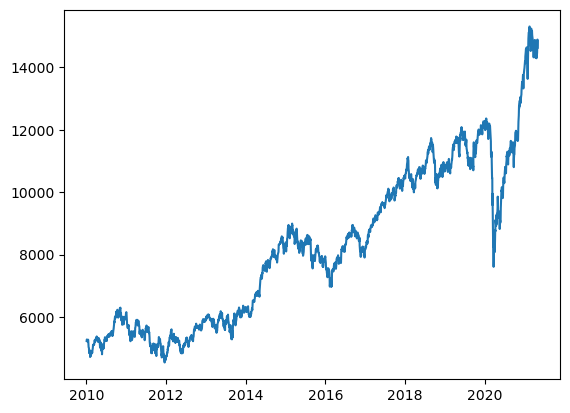

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1['Date'],df1['Close'])

In [12]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1=df1['Close']
df1

0        5232.200195
1        5277.899902
2        5281.799805
3        5263.100098
4        5244.750000
            ...     
2689    14485.000000
2690    14653.049810
2691    14864.549810
2692    14894.900390
2693    14631.099610
Name: Close, Length: 2667, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.06387819]
 [0.06812123]
 [0.06848332]
 ...
 [0.95820525]
 [0.96102318]
 [0.93653028]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.9)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(2400, 267)

In [19]:
train_data

array([[0.06387819],
       [0.06812123],
       [0.06848332],
       ...,
       [0.50239079],
       [0.43203196],
       [0.41064478]])

In [20]:
len(test_data)

267

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(2349, 50)
(2349,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(216, 50)
(216,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [201]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
37/37 [==============================] - 9s 67ms/step - loss: 0.0121 - val_loss: 0.0014
Epoch 2/100
37/37 [==============================] - 2s 44ms/step - loss: 6.0593e-04 - val_loss: 0.0037
Epoch 3/100
37/37 [==============================] - 2s 44ms/step - loss: 4.9113e-04 - val_loss: 0.0038
Epoch 4/100
37/37 [==============================] - 2s 44ms/step - loss: 4.9839e-04 - val_loss: 0.0025
Epoch 5/100
37/37 [==============================] - 2s 45ms/step - loss: 5.0305e-04 - val_loss: 0.0035
Epoch 6/100
37/37 [==============================] - 2s 44ms/step - loss: 4.7195e-04 - val_loss: 0.0023
Epoch 7/100
37/37 [==============================] - 2s 44ms/step - loss: 4.6420e-04 - val_loss: 0.0037
Epoch 8/100
37/37 [==============================] - 2s 46ms/step - loss: 5.0004e-04 - val_loss: 0.0030
Epoch 9/100
37/37 [==============================] - 2s 47ms/step - loss: 4.7581e-04 - val_loss: 0.0019
Epoch 10/100
37/37 [==============================] - 2s 48ms/step -

In [202]:
import tensorflow as tf

In [204]:
model.save('model_LSTM.m1')

INFO:tensorflow:Assets written to: model_LSTM.m1\assets


INFO:tensorflow:Assets written to: model_LSTM.m1\assets


In [97]:
tf.__version__

'2.13.0'

In [98]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

27/27 [==============================] - 1s 20ms/step


In [99]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [126]:
test_predict

array([[10123.961 ],
       [10070.184 ],
       [10095.114 ],
       [10134.804 ],
       [10215.364 ],
       [10271.783 ],
       [10258.002 ],
       [10277.738 ],
       [10263.311 ],
       [10341.416 ],
       [10352.193 ],
       [10366.548 ],
       [10369.336 ],
       [10287.547 ],
       [10230.754 ],
       [10236.013 ],
       [10257.806 ],
       [10184.834 ],
       [10130.705 ],
       [10071.438 ],
       [10139.748 ],
       [10220.08  ],
       [10238.948 ],
       [10249.511 ],
       [10258.362 ],
       [10262.626 ],
       [10295.411 ],
       [10312.781 ],
       [10290.877 ],
       [10278.114 ],
       [10173.207 ],
       [10067.09  ],
       [10063.754 ],
       [10073.824 ],
       [10017.516 ],
       [10096.256 ],
       [10202.211 ],
       [10258.315 ],
       [10186.33  ],
       [10116.882 ],
       [10156.584 ],
       [10244.651 ],
       [10307.888 ],
       [10370.971 ],
       [10363.12  ],
       [10422.154 ],
       [10408.581 ],
       [10389

In [100]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

6859.5884406026835

In [101]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

11331.36854322177

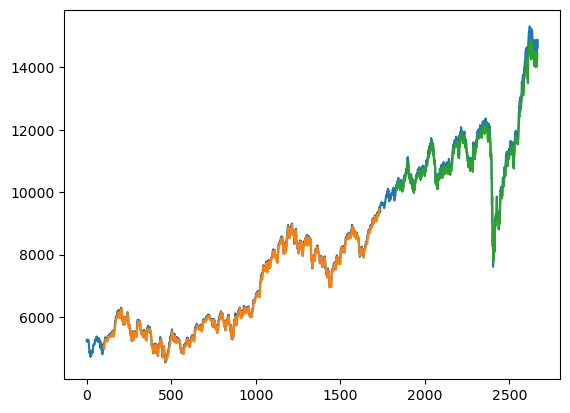

In [102]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [130]:
l_test_data=len(test_data)-100
l_test_data

834

In [131]:
x_input=test_data[l_test_data:].reshape(1,-1)
x_input.shape


(1, 100)

In [127]:
x_input

array([[[0.78220603],
        [0.79521374],
        [0.79565014],
        [0.79752102],
        [0.80909425],
        [0.83421377],
        [0.8294972 ],
        [0.83279787],
        [0.83691102],
        [0.83781156],
        [0.848475  ],
        [0.85386008],
        [0.85570304],
        [0.81557961],
        [0.82838305],
        [0.8408987 ],
        [0.8546539 ],
        [0.8661622 ],
        [0.87167721],
        [0.87625923],
        [0.87624064],
        [0.87965274],
        [0.89027438],
        [0.8964579 ],
        [0.89151384],
        [0.89068747],
        [0.91017593],
        [0.92294228],
        [0.93024929],
        [0.93037922],
        [0.93323424],
        [0.9182025 ],
        [0.9040527 ],
        [0.92632192],
        [0.93779305],
        [0.9327468 ],
        [0.91246462],
        [0.90011608],
        [0.87491758],
        [0.86099528],
        [0.84400904],
        [0.90404345],
        [0.93808546],
        [0.95127896],
        [0.96109282],
        [0

In [105]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [106]:
temp_input

[0.7838818811643462,
 0.7822060258195043,
 0.79521374226117,
 0.7956501370430111,
 0.7975210241875861,
 0.80909424919498,
 0.8342137700969252,
 0.8294972016946767,
 0.8327978655434762,
 0.8369110246335312,
 0.8378115603556886,
 0.8484750012309201,
 0.8538600808440371,
 0.8557030417085081,
 0.8155796101315727,
 0.8283830472919629,
 0.8408986965132081,
 0.8546538972867306,
 0.8661622023740021,
 0.8716772118881775,
 0.8762592266485962,
 0.8762406388393109,
 0.8796527366976219,
 0.8902743782135119,
 0.8964578989385554,
 0.8915138387765129,
 0.8906874713844819,
 0.9101759250219694,
 0.9229422775530653,
 0.9302492920801035,
 0.930379221981162,
 0.9332342426381162,
 0.9182024976007603,
 0.9040527004762766,
 0.9263219154513154,
 0.9377930458484782,
 0.9327468000869288,
 0.9124646200675623,
 0.900116075437484,
 0.8749175804860883,
 0.8609952751213987,
 0.8440090442207842,
 0.9040434520662721,
 0.9380854565999326,
 0.9512789564313269,
 0.9610928174360094,
 0.9637481825524592,
 0.9815328545650004

In [107]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<2):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.89938277]
101
1 day input [0.78220603 0.79521374 0.79565014 0.79752102 0.80909425 0.83421377
 0.8294972  0.83279787 0.83691102 0.83781156 0.848475   0.85386008
 0.85570304 0.81557961 0.82838305 0.8408987  0.8546539  0.8661622
 0.87167721 0.87625923 0.87624064 0.87965274 0.89027438 0.8964579
 0.89151384 0.89068747 0.91017593 0.92294228 0.93024929 0.93037922
 0.93323424 0.9182025  0.9040527  0.92632192 0.93779305 0.9327468
 0.91246462 0.90011608 0.87491758 0.86099528 0.84400904 0.90404345
 0.93808546 0.95127896 0.96109282 0.96374818 0.98153285 0.98092935
 0.9806694  0.98687151 0.98594305 1.         0.99988394 0.99017689
 0.98182536 0.9436516  0.96911005 0.97981982 0.92706469 0.94864209
 0.96326999 0.99358427 0.97827861 0.96503407 0.96671464 0.97991738
 0.98701078 0.97365489 0.96423563 0.96246692 0.94490503 0.9297293
 0.94701265 0.94630706 0.95358152 0.92894482 0.90810085 0.92503594
 0.95639937 0.94206397 0.9584652  0.93715237 0.94139546 0.95398074
 0.95906407 0.9554477  0.90679166 0.9

In [113]:
day_new=np.arange(1,101)
day_pred=np.arange(101,103)

In [114]:
len(day_new)

100

In [115]:
import matplotlib.pyplot as plt

In [116]:
len(df1)

2667

In [128]:
scaler.inverse_transform(lst_output)

array([[14231.00232444],
       [13927.74446302]])

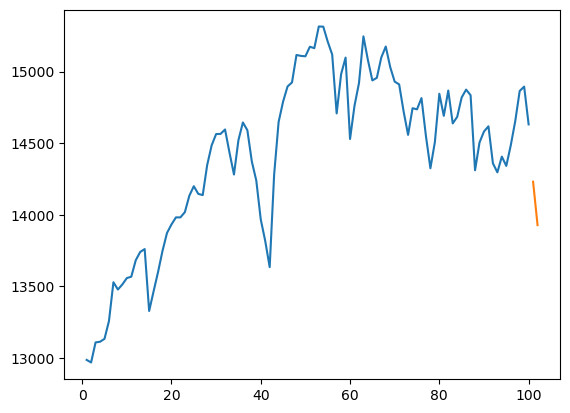

In [117]:
plt.plot(day_new,scaler.inverse_transform(df1[2567:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

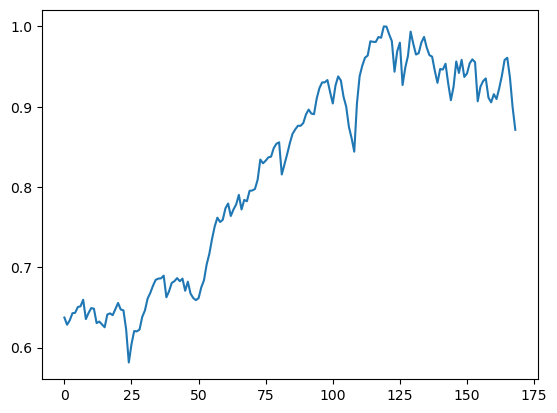

In [123]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2500:])

In [124]:
df3=scaler.inverse_transform(df3).tolist()

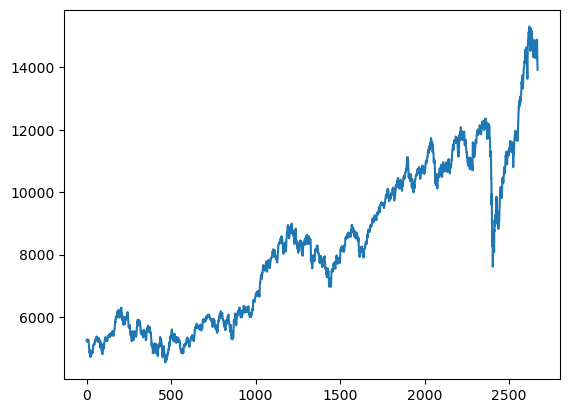

In [125]:
plt.plot(df3)